In [2]:
import pandas as pd

file_name='data/seoul_covid_10_31_.csv'


In [3]:

data = pd.read_csv('data/seoul_covid_10_31_.csv', encoding='utf-8')
print(data.shape)
data.info()

(6056, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      6056 non-null   int64 
 1   환자      6056 non-null   int64 
 2   확진일     6056 non-null   object
 3   거주지     6056 non-null   object
 4   여행력     6056 non-null   object
 5   접촉력     6056 non-null   object
 6   퇴원현황    5574 non-null   object
dtypes: int64(2), object(5)
memory usage: 331.3+ KB


In [4]:
data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN
3,6053,26617,10.31.,용산구,-,종로구 고등학교 관련,NaN
4,6052,26613,10.31.,은평구,-,기타확진자 접촉,NaN


In [5]:
#연번 순서대로 내림차순 정렬을 해서 다시 저장한거 . 데이타 프에임 에다강. 
data=data.sort_values(by='연번',ascending=False)
data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN
2,6054,26616,10.31.,서초구,-,종로구 고등학교 관련,NaN
3,6053,26617,10.31.,용산구,-,종로구 고등학교 관련,NaN
4,6052,26613,10.31.,은평구,-,기타확진자 접촉,NaN


# 시각화 관련 설정

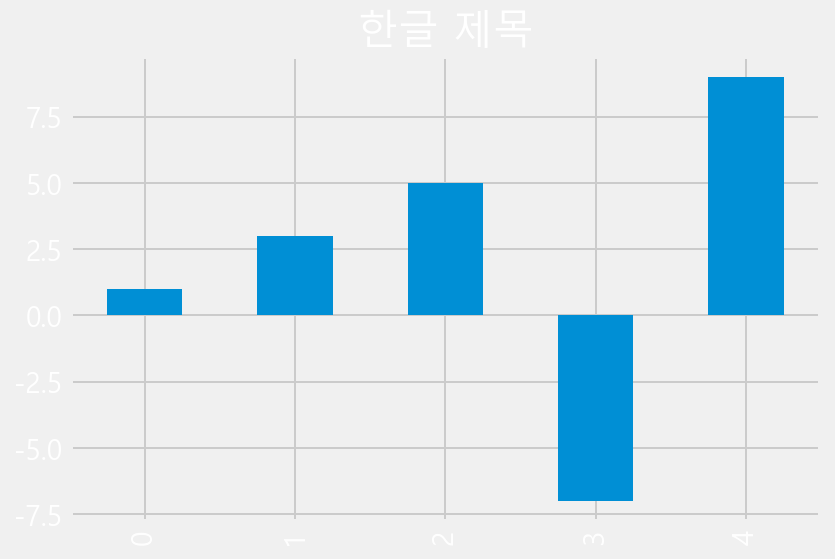

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt

#한글폰트 설정
plt.rc('font',family='Malgun Gothic') #AppleGothic

#마이너스 가 네모로 나오니까마이너스 값을 출력하기 위한 설정 필요함 축(axis)의 레이블값에
plt.rc('axes',unicode_minus=False)

#그래프 style설정 - ggplot, fivethirtyeight, dark_backgroud
plt.style.use('fivethirtyeight')

#간단한 bar plot 그리기  시리즈 객체를 만든다 
pd.Series([1,3,5,-7,9]).plot.bar(title='한글 제목')

#시각화 할때 폰트가 좀 더 선명하게 보이도록 하는 설정
#retina 디스플레이가 지원되는 환경에서만 가능
from IPython.display import set_matplotlib_formats


set_matplotlib_formats('retina')

# 1. 확진일


## 확진일 컬럼의 타입 object를 datetime 타입으로 변경하기 -> to_datetime() 이라는 함수 사용!
 
 ## 확진일자 컬럼의 값에서 dt.month 와 dt.week를 사용해서 월과 주 컬럼 추가하기
## 확진일자 별로 시각화
 
 

In [17]:
data['확진일'].value_counts().head()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
Name: 확진일, dtype: int64

In [24]:
#확진일 컬럼 값의 타입 확인
print(data['확진일'].dtypes)
#pandas의 to_datetime() 함수를 사용해서 날짜타입으로 변경하기
#새로운 확진일자 컬럼을 추가하기          
data['확진일자']=pd.to_datetime("2020-"+data['확진일'].str.replace('.','-')) 
#data['확진일']은시리즈타입이라서 바로리플레이스할수없다. 그래서 일시적으로str으로 만들어줌
print(data['확진일자'].dtypes)

object
datetime64[ns]


In [28]:
#확진일자 컬럼에서 월 만 추출하고, 월 컬럼을 추가하기
data['확진일자'].dt.day

0       31
1       31
2       31
3       31
4       31
        ..
6051    31
6052    30
6053    30
6054    30
6055    24
Name: 확진일자, Length: 6056, dtype: int64

In [29]:
data['월']=data['확진일자'].dt.month
data[['확진일','확진일자','월']].head()

,확진일,확진일자,월
0,10.31.,2020-10-31,10
1,10.31.,2020-10-31,10
2,10.31.,2020-10-31,10
3,10.31.,2020-10-31,10
4,10.31.,2020-10-31,10


In [30]:
#해당 연도에서 몇번째 ' 주' 인지 추출하기
data['주']=data['확진일자'].dt.week
data[['확진일','확진일자','월','주']].head()

,확진일,확진일자,월,주
0,10.31.,2020-10-31,10,44
1,10.31.,2020-10-31,10,44
2,10.31.,2020-10-31,10,44
3,10.31.,2020-10-31,10,44
4,10.31.,2020-10-31,10,44


In [31]:
#확진일자로 line plt(선그래프) 그리기
data['확진일자'].value_counts().sort_index()

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-10-27    31
2020-10-28    31
2020-10-29    52
2020-10-30    46
2020-10-31    45
Name: 확진일자, Length: 253, dtype: int64

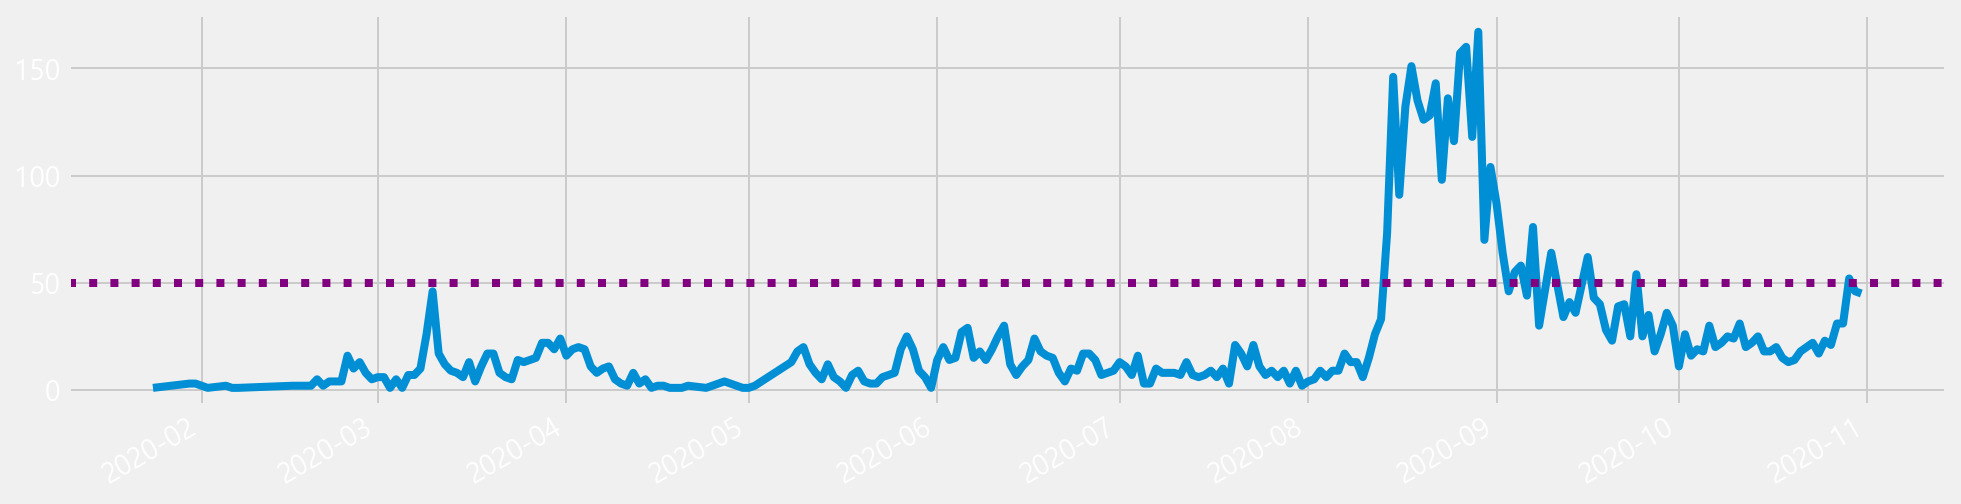

In [38]:
data['확진일자'].value_counts().sort_index().plot(figsize=(15,4))

#수평선 표시하기
plt.axhline(50,color='purple',linestyle=':')

In [39]:
data['확진일자'].head(2)

0   2020-10-31
1   2020-10-31
Name: 확진일자, dtype: datetime64[ns]

In [40]:
'2020-10-31'[-5:]

'10-31'

In [41]:
#시리즈객체를 str타입으로 변경하고, map() 인자에 lambda식을 인자로 전닳ㄴ다. 
data['확진일자'].astype(str).map(lambda x: x[-5:]) #.str 과 같다 !

0       10-31
1       10-31
2       10-31
3       10-31
4       10-31
        ...  
6051    01-31
6052    01-30
6053    01-30
6054    01-30
6055    01-24
Name: 확진일자, Length: 6056, dtype: object

In [42]:
#월 일 컬럼을 추가하기
data['월일'] = data['확진일자'].astype(str).map(lambda x: x[-5:])
data[['확진일자','월일']]

,확진일자,월일
0,2020-10-31,10-31
1,2020-10-31,10-31
2,2020-10-31,10-31
3,2020-10-31,10-31
4,2020-10-31,10-31
...,...,...
6051,2020-01-31,01-31
6052,2020-01-30,01-30
6053,2020-01-30,01-30
6054,2020-01-30,01-30


In [49]:
day_count = data['월일'].value_counts().sort_index()
day_count.head()
len(day_count) #253일동안 날짜별로 확진자ㅇ거ㅏ 이슨거


253

In [50]:
 #iloc 2번째행의 값을 가져오는 것이다. 
day_count.iloc[2]


3

In [52]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count>30:
        print(i,case_count)

28 46
173 33
174 73
175 146
176 91
177 132
178 151
179 135
180 126
181 128
182 143
183 98
184 136
185 116
186 157
187 160
188 118
189 167
190 70
191 104
192 87
193 64
194 46
195 55
196 58
197 44
198 76
200 47
201 64
202 49
203 34
204 41
205 36
206 49
207 62
208 43
209 40
212 39
213 40
215 54
217 35
220 36
232 31
248 31
249 31
250 52
251 46
252 45


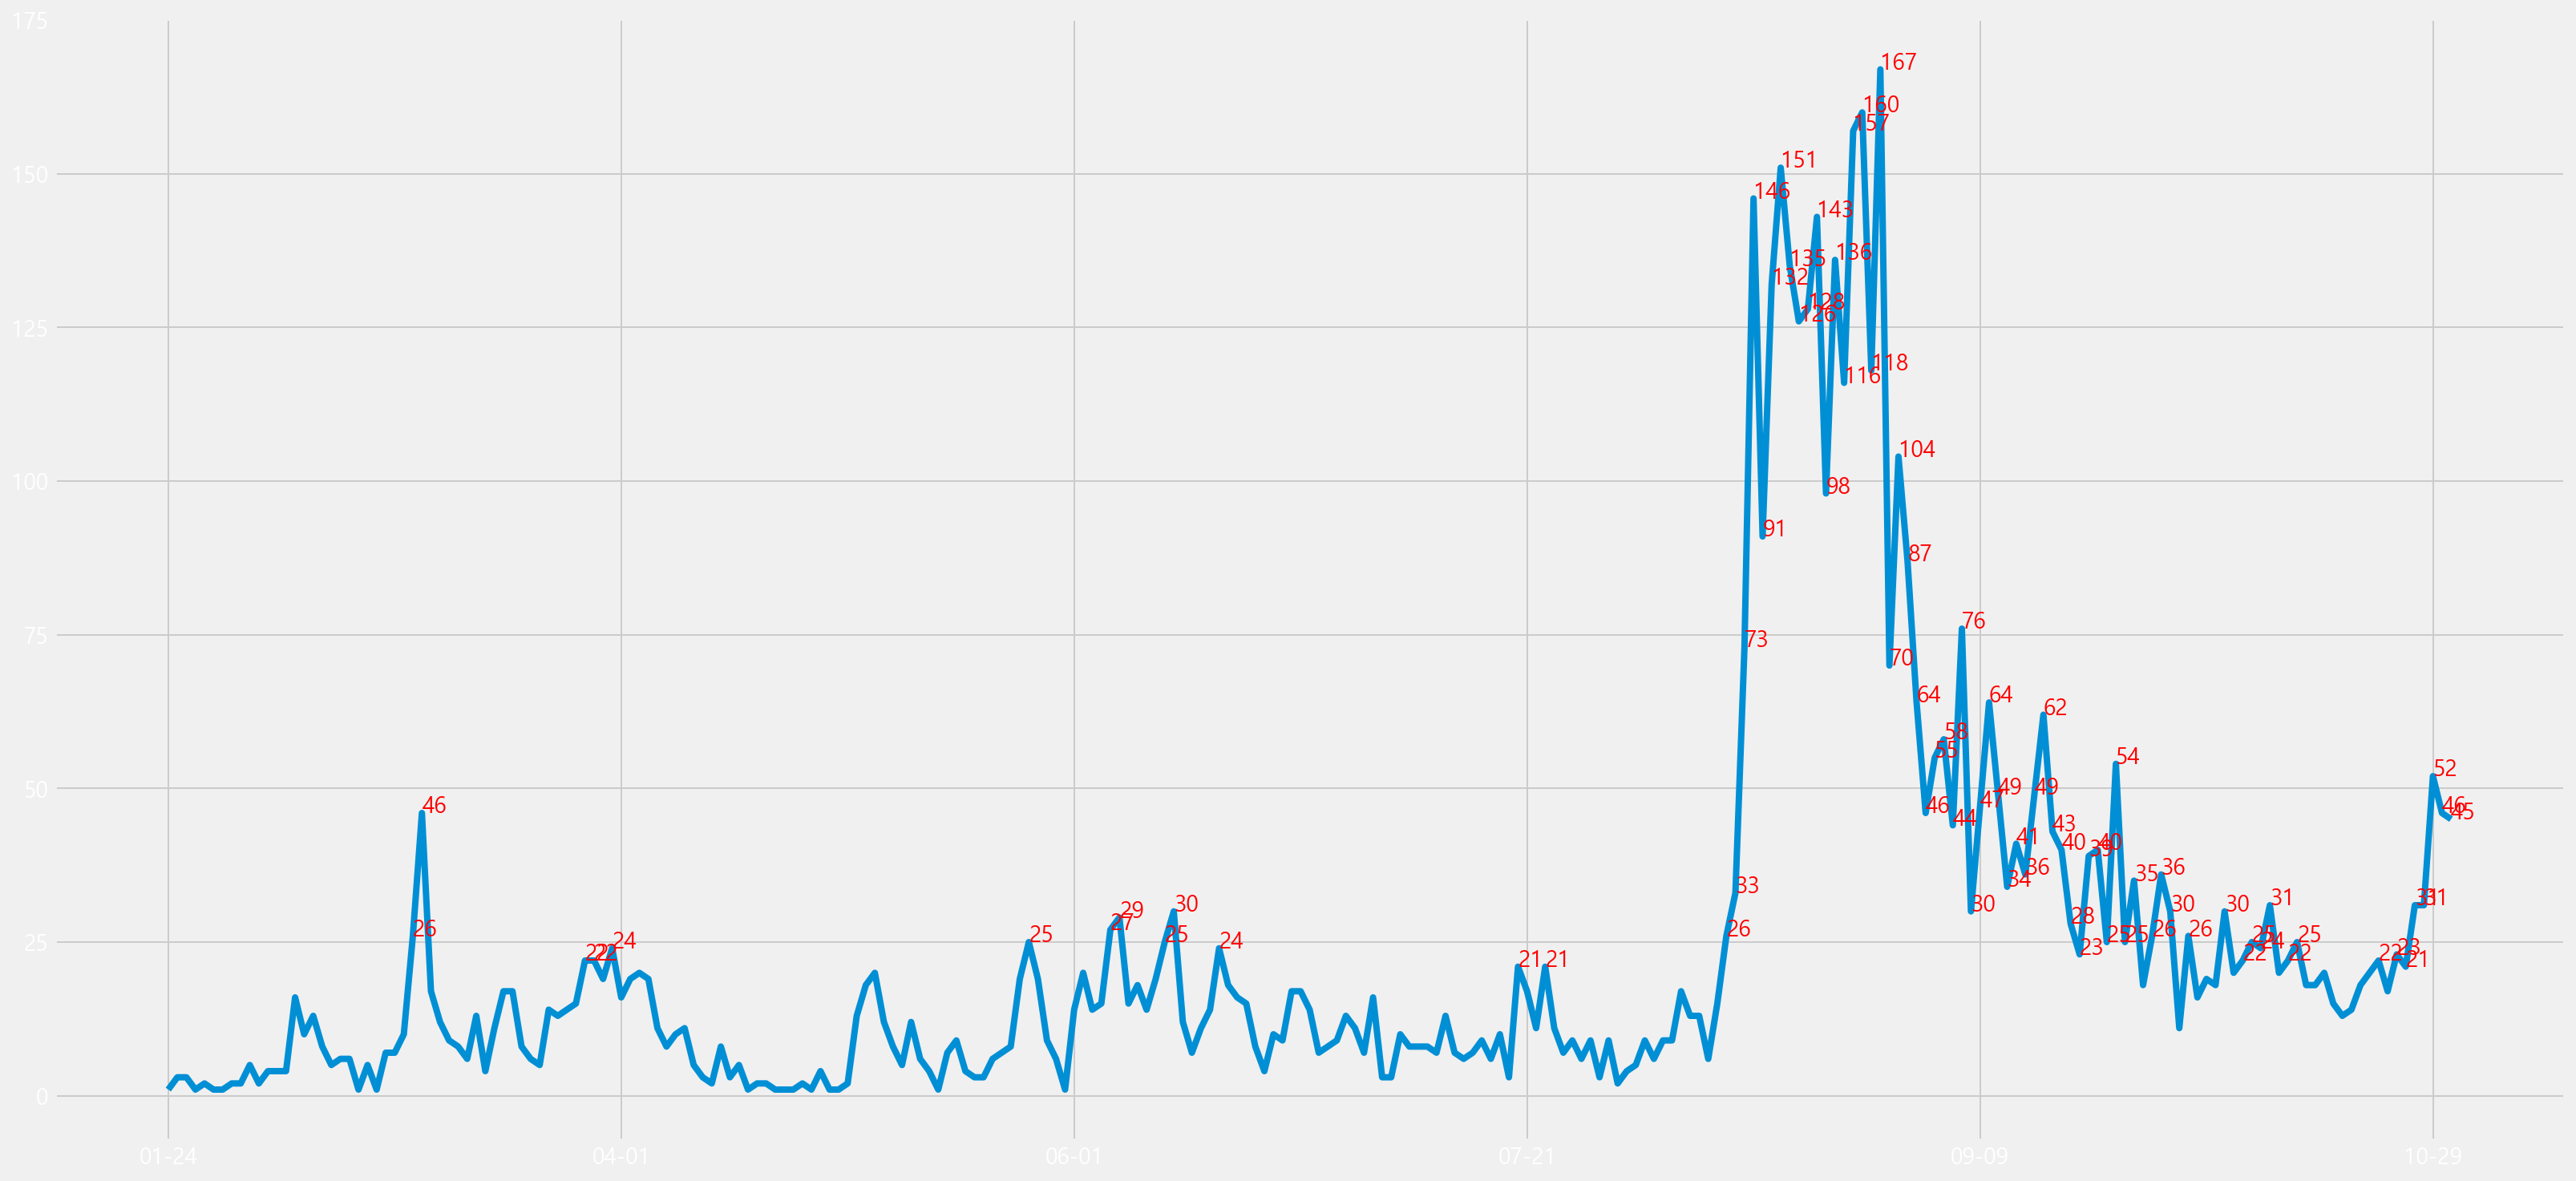

In [58]:
plot = day_count.plot(figsize=(25,12))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count>20:
        plot.text(x=i,y=case_count, s= case_count, color='red')
        

## 확진자가 가장 만ㅇ히 나온날  ㅡ 


In [60]:
day_count.describe()

count    253.000000
mean      23.936759
std       32.280700
min        1.000000
25%        6.000000
50%       14.000000
75%       25.000000
max      167.000000
Name: 월일, dtype: float64

In [61]:
#확진자가  가장 많았던 날을 찾기 
day_count[day_count == day_count.max()]


08-29    167
Name: 월일, dtype: int64

In [62]:
day_count.head()

01-24    1
01-30    3
01-31    3
02-02    1
02-05    2
Name: 월일, dtype: int64

In [64]:
#확진자가 가장 많았던 날의 발생 이력을 찾기
data.loc[data['월일']=='08-29'].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
2143,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2178,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
2205,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
2206,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
2207,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29


### 1.3 line plot(선그래프)를 bar plot 으로 그리기 

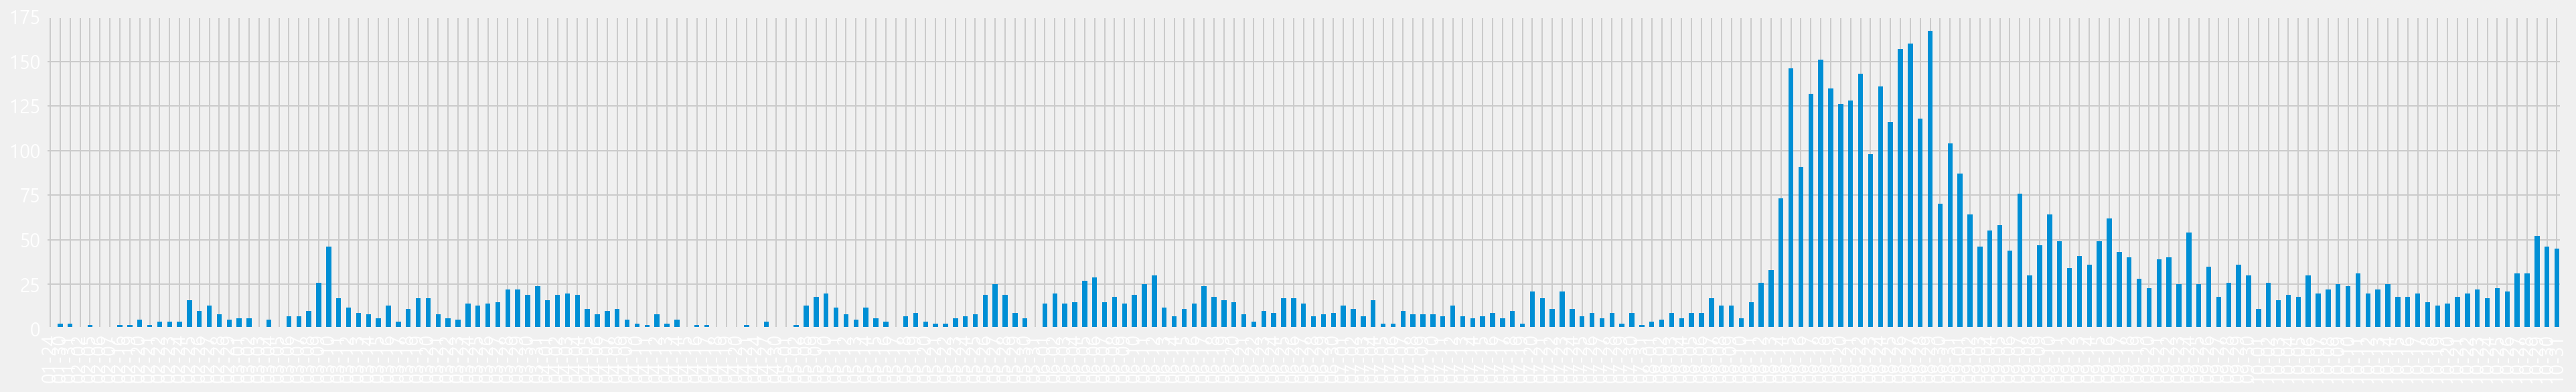

In [65]:
day_count.plot.bar(figsize=(30,4)) #s짱많아ㅓ


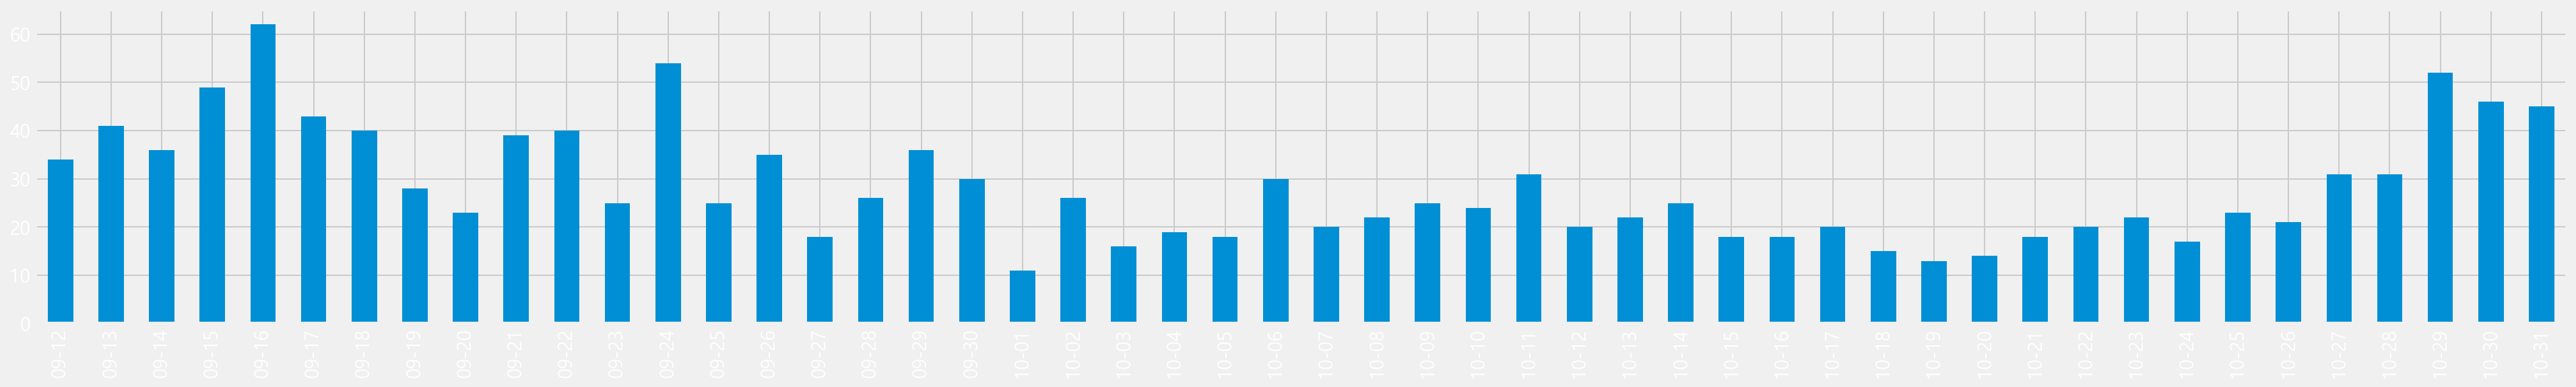

In [68]:
#슬라이싱 통해서 최신 데이터만 그려보기 
day_count[-50:].plot.bar(figsize=(30,4))

25.0


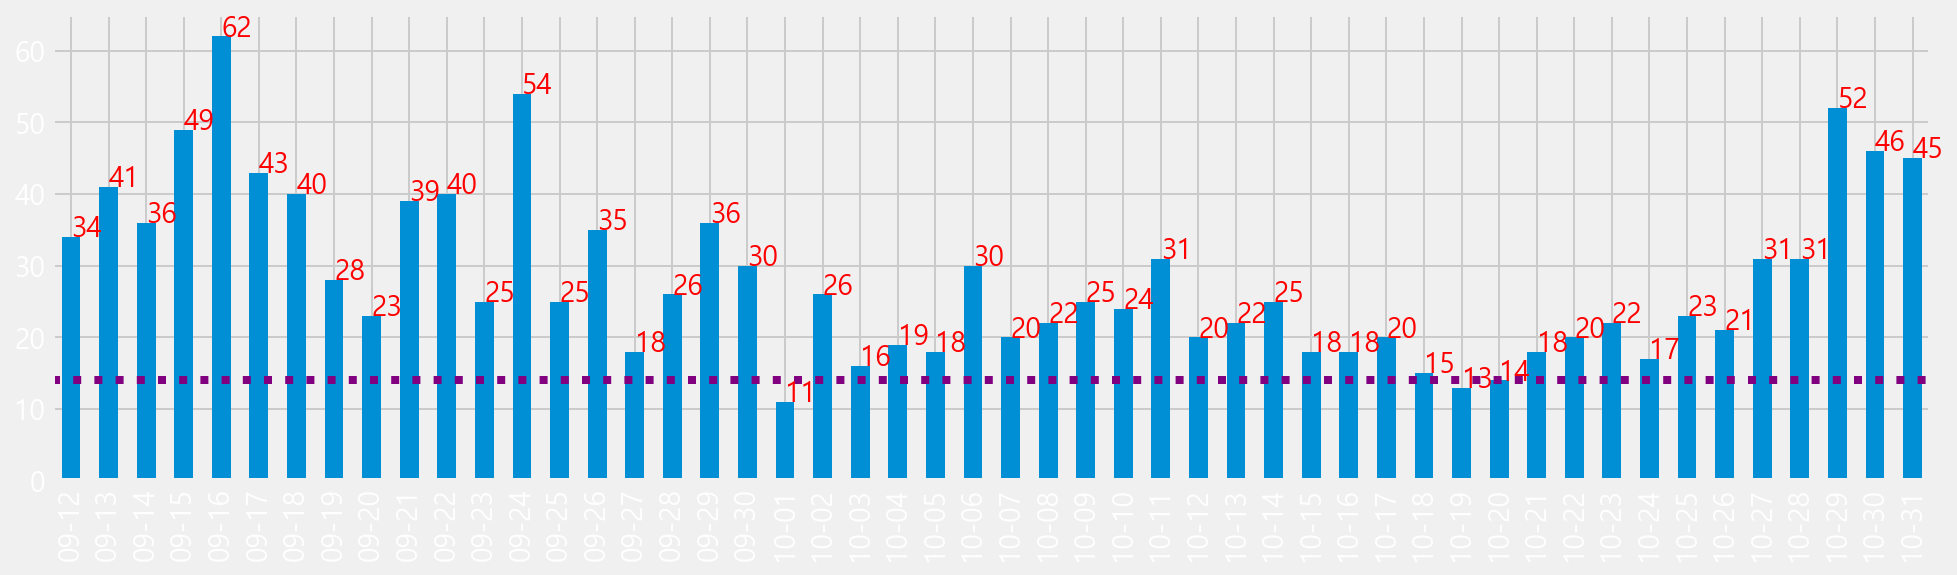

In [78]:
#중간값
print(day_count[-50:].median())
#슬라이싱으로 최신 데이터만 그려보기
bar_plot = day_count[-50:].plot.bar(figsize=(15,4))
bar_plot.axhline(day_count.median(), linestyle=":",color='purple')
for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        bar_plot.text(x=i, y=case_count, s=case_count, color='red')

## 1.4 월 별 확진자수 그리기 

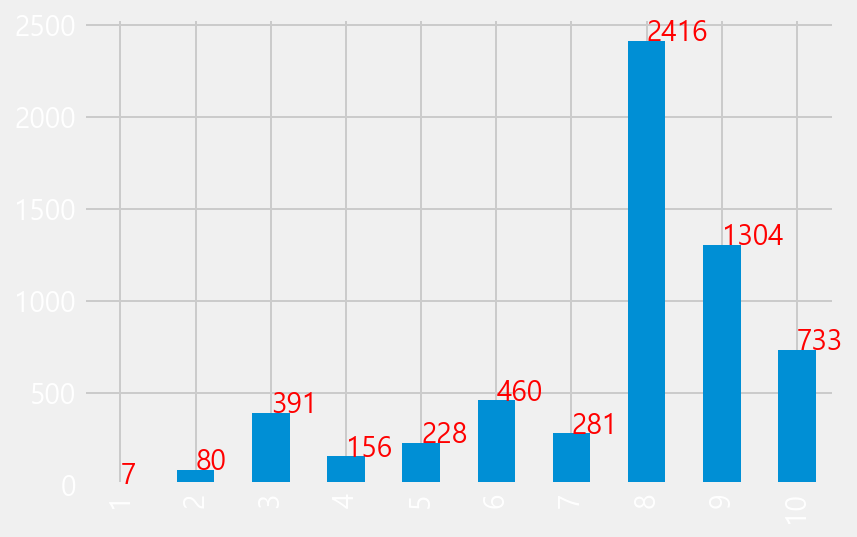

In [89]:
#월 별 확진자수에 대한 빈도수를 구해서 시각화하기
month_case= data['월'].value_counts().sort_index()
month_case
bar_plot=month_case.plot.bar()
for i in range(len(month_case)):
    bar_plot.text(x=i, y=month_case.iloc[i], s=month_case.iloc[i], color='red')

## 2. 모든 날짜를 행에 만들어 주기 
*확진자가 없는 날의 데이터도 만들어 주기 

In [92]:
data['확진일자'].value_counts()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
             ... 
2020-04-15      1
2020-01-24      1
2020-04-20      1
2020-02-02      1
2020-02-06      1
Name: 확진일자, Length: 253, dtype: int64

In [94]:
data.head(2)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,6056,26629,10.31.,서초구,-,기타확진자 접촉,NaN,2020-10-31,10,44,10-31
1,6055,26618,10.31.,구로구,-,강남구 헬스장 관련,NaN,2020-10-31,10,44,10-31


In [98]:
first_day =data.iloc[-1,7] #맨끝에 있는 행을 선택(가장 최초의 확진일자)
first_day

Timestamp('2020-01-24 00:00:00')

In [99]:
#맨위에 있는 행을 선택하기 (최근의 확진일자)
last_day=data.iloc[0,7]
last_day

Timestamp('2020-10-31 00:00:00')

In [103]:
#pd.date_range()함수를 통해서 시작하는 날짜부터 끝나는 날짜까지
#DatetimeIndex객체를 생성한다.
days=pd.date_range(first_day, last_day)
print(type(days))
days[:5]

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [104]:
#데이터타임인텍스로 데이터 푸러ㅔ임을 만들거다
#DateTimeIndex 객체인 days를 DataFrame 으로 생성하기
df_days=pd.DataFrame({'확진일자':days})
print(df_days.shape)
df_days.head()

(282, 1)


,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [105]:
#확진일자별로 빈도수 구하기
daily_case=data['확진일자'].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일자, dtype: int64

In [110]:
#t시리즈를 데이터프레임으로 변환
#확진일자별로 빈도수를 구한 series객체를 dataframe으로 변환
df_daily_case = daily_case.to_frame()
print(df_daily_case.shape)
df_daily_case.head()


(253, 1)


,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [111]:
#컬럼명 변경
df_daily_case.columns = ['확진자수']
df_daily_case.head(2)

,확진자수
2020-08-29,167
2020-08-27,160


In [112]:
df_days.head(2)

,확진일자
0,2020-01-24
1,2020-01-25


In [114]:
#확진가가 없는 날도 일자에 표함이 되도록 전체일자와 확진일자 데이터를  merge로 합친다
all_day=df_days.merge(df_daily_case, left_on='확진일자',\
                     right_on=df_daily_case.index, how='left')
print(all_day.shape)
all_day.head()

(282, 2)


,확진일자,확진자수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [117]:
#확진자수 결측치(outlier) 값은 0으로 채우고 값을 누적해서 더해준다. 0으로 채울때 fillna라는 함수를 쓴다! 앞에서 했었다!
#fillna()함수는 결측치 값을 다른 값으로 채워줄때 사용하는ㅅ함수
#누적확진 컬럼을 추가하고 누적된 값을 할당한다. 
all_day['누적확진']=all_day['확진자수'].fillna(0).cumsum() #값을 누적해주는 함수
all_day.tail()

,확진일자,확진자수,누적확진
277,2020-10-27,31.0,5882.0
278,2020-10-28,31.0,5913.0
279,2020-10-29,52.0,5965.0
280,2020-10-30,46.0,6011.0
281,2020-10-31,45.0,6056.0


In [118]:
all_day.head()

,확진일자,확진자수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0


In [119]:
#확진일자에서 연도는 제외하고 월-일 로 '일자'컬럼 만들기 
all_day['일자']=all_day['확진일자'].astype(str).map(lambda x:x[-5:])
all_day.head()

,확진일자,확진자수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [135]:
#확진자수 누적확진, 일자 컬럼을 선택해서 새로운 dataframe를 생성하기 
cum_day=all_day[['확진자수','누적확진','일자']]
cum_day=cum_day.set_index('일자')
cum_day

,확진자수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
10-27,31.0,5882.0
10-28,31.0,5913.0
10-29,52.0,5965.0


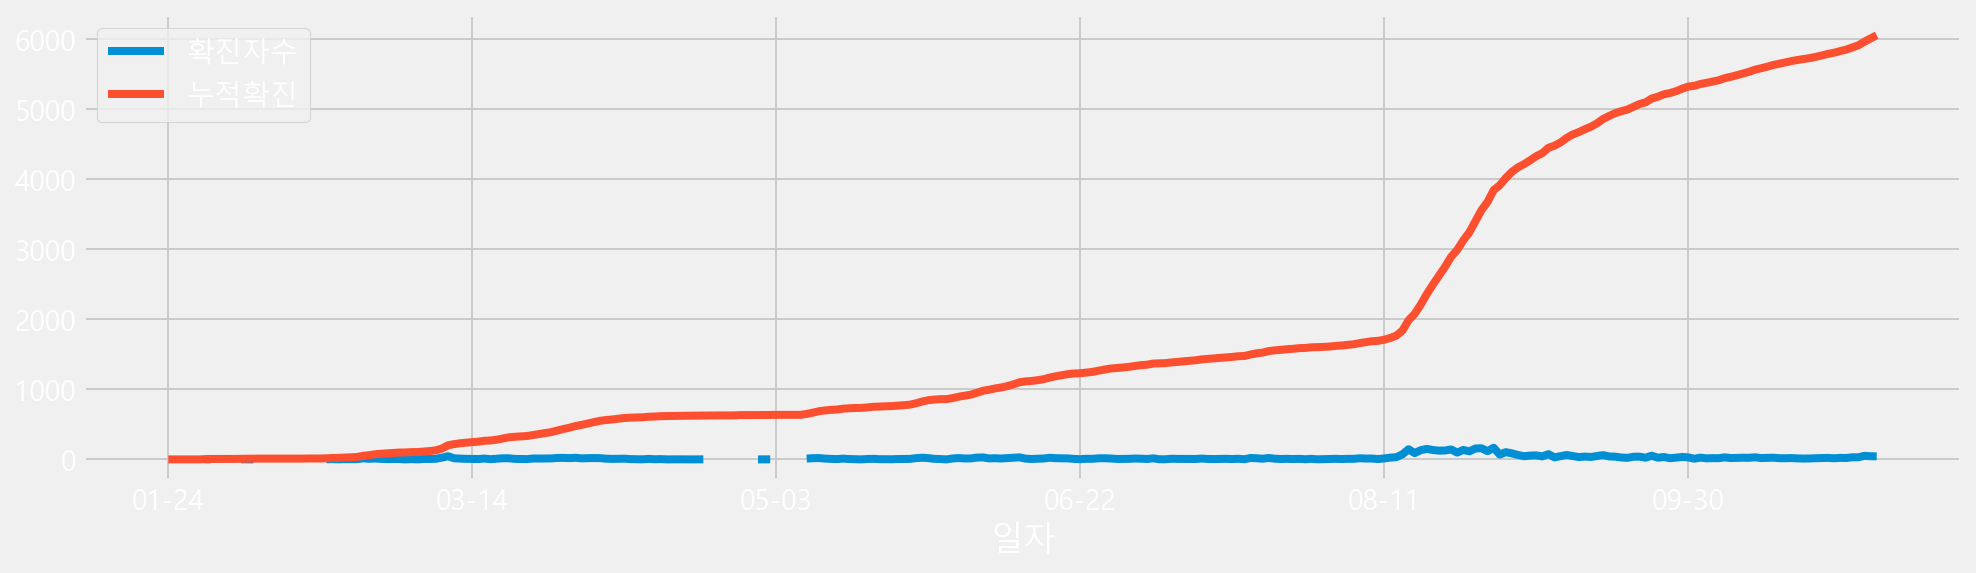

In [136]:
#dataframe으로 확진자수와 누적확진을 
cum_day.plot(figsize=(15,4))

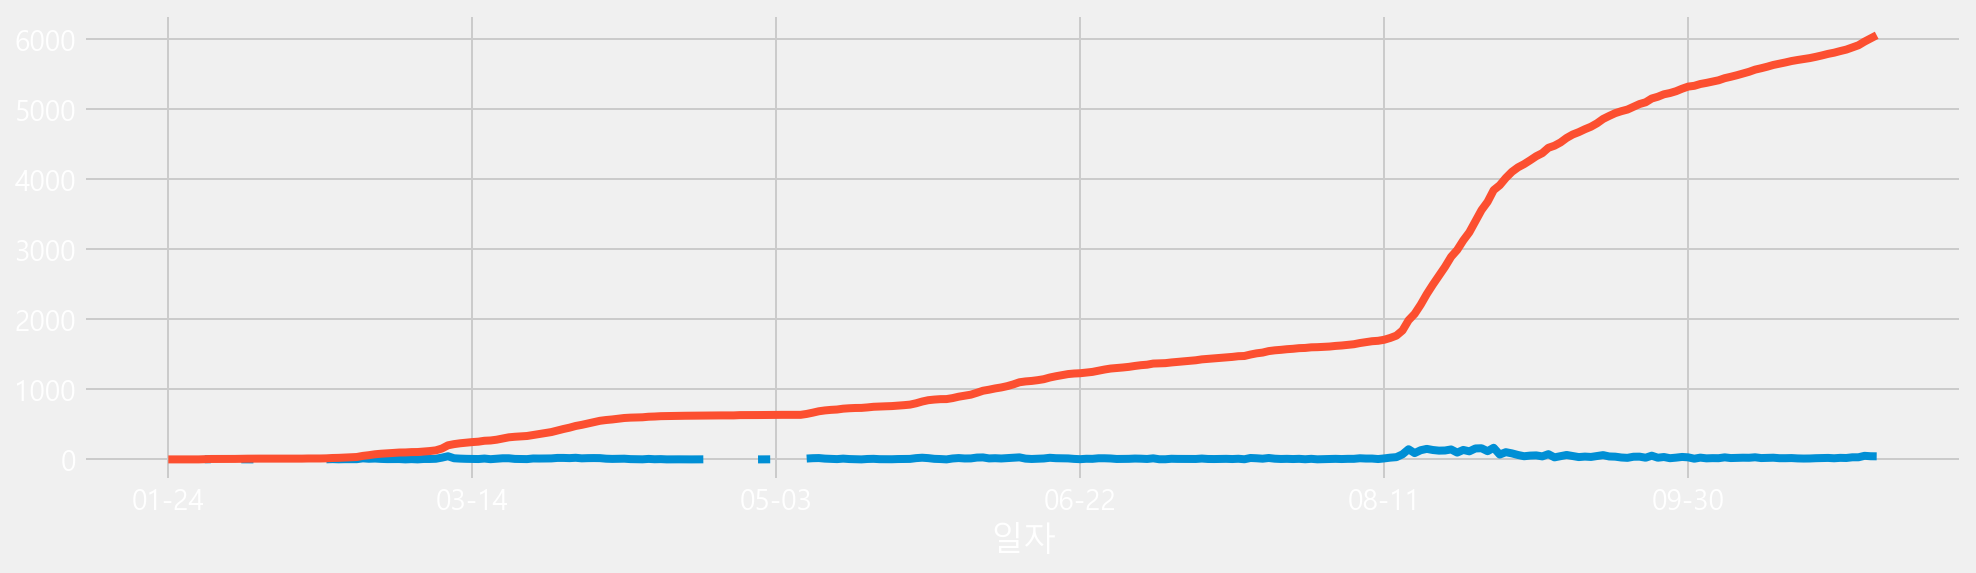

In [137]:
#series로 2개의 line plot을 그리기
cum_day['확진자수'].plot()
cum_day['누적확진'].plot(figsize=(15,4))

#  로그스케일

* 누적확진수와 확진자수의 차이가 너무 커서 그래프가 자세하게 보이지 안흐을 경우에 
* 로그스케일로 표현을 하면 차이가 큰 값의 스케일을 조정해줍니다.
* numpy 의 log()함수 를 사용합니다.

In [139]:
cum_day['누적확진']

일자
01-24       1.0
01-25       1.0
01-26       1.0
01-27       1.0
01-28       1.0
          ...  
10-27    5882.0
10-28    5913.0
10-29    5965.0
10-30    6011.0
10-31    6056.0
Name: 누적확진, Length: 282, dtype: float64

In [142]:
import numpy as np

np.log(cum_day['누적확진'])

일자
01-24    0.000000
01-25    0.000000
01-26    0.000000
01-27    0.000000
01-28    0.000000
           ...   
10-27    8.679652
10-28    8.684909
10-29    8.693664
10-30    8.701346
10-31    8.708805
Name: 누적확진, Length: 282, dtype: float64

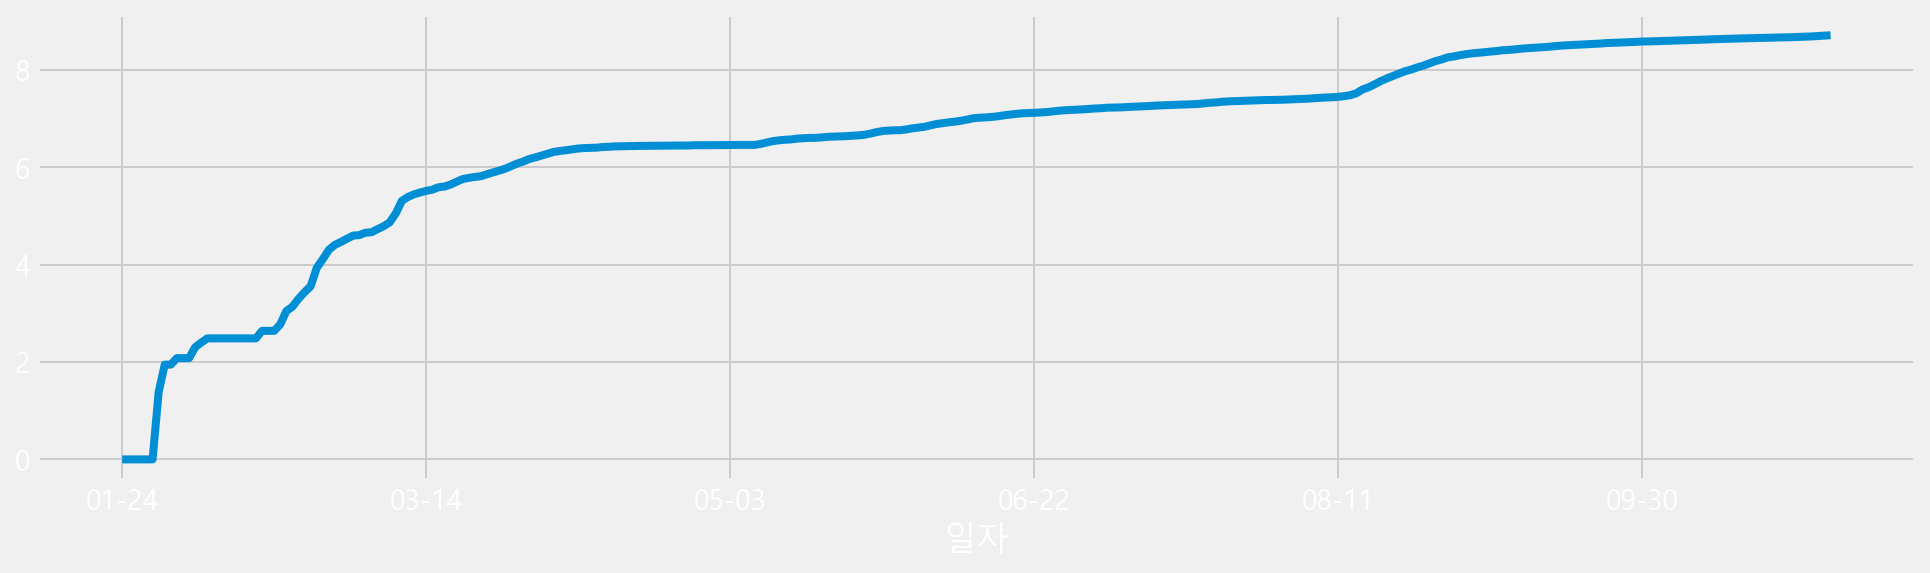

In [143]:
np.log(cum_day['누적확진']).plot(figsize=(15,4))

## 확진 월과 요일 구하기 
all_day

In [144]:
all_day.head(1)

,확진일자,확진자수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24


In [171]:
#확진월
all_day['확진월']=all_day['확진일자'].dt.month
#확진요일
all_day['확진요일']=all_day['확진일자'].dt.dayofweek
all_day.head(2)

,확진일자,확진자수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5


In [172]:
#월별, 요일별 확진자수를 groupby로 구하기
all_day_week=all_day.groupby(['확진월','확진요일'])['확진자수'].sum()
all_day_week

확진월  확진요일
1    0         0.0
     1         0.0
     2         0.0
     3         3.0
     4         4.0
             ...  
10   2        94.0
     3       123.0
     4       137.0
     5       122.0
     6        88.0
Name: 확진자수, Length: 70, dtype: float64

In [173]:
#unstack()은 인덱스를 컬럼으로 변경해주는 함수
#fillna(0) 는 결측치(NAN)을 0으로 채워주는 함수
#astype(int)는 int 타입으로 변환해주는 함수

all_day_week=all_day_week.unstack().fillna(0).astype(int)
all_day_week


확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [174]:
#df_daily_case.columns = ['확진자수']
dayofweek='월 화 수 목 금 토 일'
dayofweek= dayofweek.split() #공백을짤라줌
print(type(dayofweek))
dayofweek


all_day_week.columns=dayofweek
all_day_week

<class 'list'>


,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [183]:
#style.background_gradient로 색상을 표현합니다.

all_day_week.style.background_gradient(cmap='Purples')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126
